In [79]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv (city_data_to_load)
ride_df = pd.read_csv (ride_data_to_load)

city_df = city_df.drop_duplicates('city', keep = 'first')

# Combine the data into a single dataset
merged_data = city_df.merge(ride_df, on = 'city')

# Display the data table for preview
merged_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


0


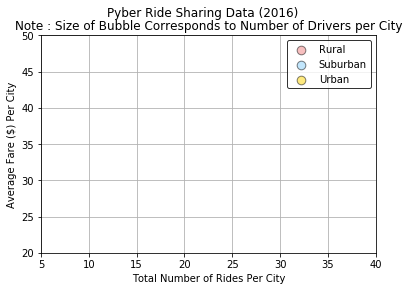

<Figure size 432x288 with 0 Axes>

In [80]:
# Obtain the x and y coordinates for each of the three city types

avg_fare = merged_data.groupby('city')['fare'].mean()
total_rides = merged_data.groupby('city')['ride_id'].count()
total_drivers = merged_data.groupby ('city')['driver_count'].sum()
city_type = merged_data.groupby('city')['type']



city = pd.DataFrame({
    "Number of Rides": total_rides,
    "Average Fare":avg_fare,
    "Number of Drivers": total_drivers,
    "Type of City": city_type
})

city.sort_values('Number of Drivers', ascending = False)

Rural = city[city['Type of City']=='Rural']
Suburban = city [city['Type of City']=='Suburban']
Urban = city [city['Type of City']=='Urban']


color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}
city_color = {'Rural':color_scheme['Light Coral'],'Urban': color_scheme ['Gold'], 'Suburban': color_scheme['Light Sky Blue']}

print(len(rural))

# Build the scatter plots for each city types
plt.scatter(rural['Number of Rides'], rural ['Average Fare'], s = rural['Number of Drivers']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .5)
plt.scatter(suburban['Number of Rides'], suburban ['Average Fare'], s = suburban['Number of Drivers']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .5)
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s= urban['Number of Drivers']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .5)

# Incorporate the other graph properties
plt.ylabel('Average Fare ($) Per City')
plt.xlabel('Total Number of Rides Per City')
plt.suptitle('Pyber Ride Sharing Data (2016)')
plt.title('Note : Size of Bubble Corresponds to Number of Drivers per City')
plt.xlim(5,40)
plt.ylim(20,50)
plt.grid()

# Create a legend
plt.legend(city_type, loc="best")

# Incorporate a text label regarding circle size
legend = plt.legend (frameon = True, edgecolor = 'black')
legend.legendHandles[0]._sizes = [75]
legend.legendHandles[1]._sizes = [75]
legend.legendHandles[2]._sizes = [75]

plt.show()

# Save Figure
plt.savefig("PyberRideSharing.png")

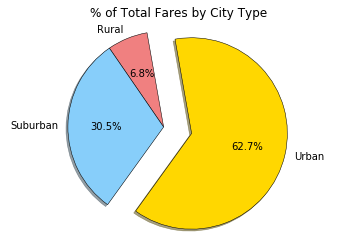

<Figure size 432x288 with 0 Axes>

In [81]:
# Calculate Type Percents
type = merged_data.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

#total fare by city
total_fare = type.sum()['fare']

#pie chart build
labels = total_fare.index

# Build Pie Chart
color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}
city_color = {'Rural':color_scheme['Light Coral'],'Urban': color_scheme ['Gold'], 'Suburban': color_scheme['Light Sky Blue']}

colors = [city_color[n] for n in labels]
explode = [0 , 0, .3]
plt.pie(total_fare, startangle = 100, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.show()


# Save Figure
plt.savefig("TotalFaresbyCity.png")

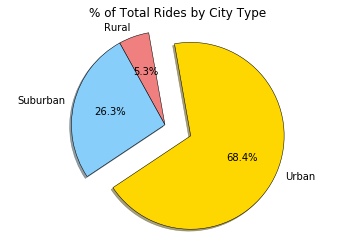

<Figure size 432x288 with 0 Axes>

In [82]:
# total rides
total_rides = type.count()['ride_id']

#pie chart build
labels = total_rides.index
plt.pie(total_rides, startangle = 100, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.show()

#save figure
plt.savefig("TotalRidesbyCity.png")

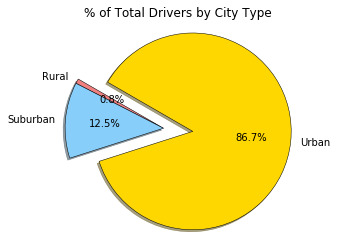

<Figure size 432x288 with 0 Axes>

In [83]:
#% of driver per city type
total_drivers = type.sum()['driver_count']

labels = total_drivers.index
plt.pie(total_drivers, startangle = 150, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.show()
plt.savefig("TotalDriversbyCity.png")